#**問題1　train_test_splitのスクラッチ**


train_test_splitのスクラッチ

In [3]:
import numpy as np

def scrath_train_test_split(X, y, train_size=0.8,):
    Z = np.c_[X, y]
    np.random.shuffle(Z)
    X_shuffle = Z[:, :-1]
    y_shuffle = Z[:, -1]
    y_shuffle = y_shuffle.astype("int")

    X_train, X_test = np.split(X_shuffle, [int(X[:,1].size*train_size)],0)
    y_train, y_test = np.split(y_shuffle, [int(y.size*train_size)])
    #print(X_train)
    #print(X_test)
    #y_train.reshape(-1, 1)
    #y_test.reshape(-1, 1)

    return X_train, X_test, y_train, y_test

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

sgd = SGDClassifier(loss="log")
svc = SVC()
tree = DecisionTreeClassifier()



In [5]:
from sklearn.datasets import load_iris
import pandas as pd

In [6]:
iris_data = load_iris()
X_iris = pd.DataFrame(iris_data["data"], columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_iris = pd.DataFrame(iris_data["target"], columns=["Species"])

df = pd.concat([X_iris, y_iris],axis=1)

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df2 = df[df["Species"].isin(["1","2"])]
df2
X_iris_data = df2.iloc[:,:4].values
y_iris_data = df2.iloc[:,4].values

In [9]:
X_train, X_test, y_train, y_test = scrath_train_test_split(X_iris_data, y_iris_data, train_size=0.8)

In [10]:
model_log = SGDClassifier(loss="log")
model_log.fit(X_train, y_train)
y_pred_log = model_log.predict(X_test)
print(y_pred_log)
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1]
[2 2 1 1 1 1 2 1 1 2 2 2 1 1 2 2 2 1 1 1]


In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_log)

0.6

In [12]:
from sklearn.model_selection import train_test_split

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_iris_data, y_iris_data, train_size=0.8)
print(X_train_t)
print(X_test_t)
print(y_train_t)
print(y_test_t)


[[6.5 3.  5.8 2.2]
 [6.7 3.  5.2 2.3]
 [6.3 3.3 6.  2.5]
 [5.6 2.7 4.2 1.3]
 [6.1 2.6 5.6 1.4]
 [6.1 3.  4.6 1.4]
 [6.  3.  4.8 1.8]
 [6.7 3.3 5.7 2.1]
 [7.6 3.  6.6 2.1]
 [6.4 3.2 4.5 1.5]
 [6.7 3.  5.  1.7]
 [6.8 3.  5.5 2.1]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.5 1.8]
 [6.  2.7 5.1 1.6]
 [6.9 3.1 4.9 1.5]
 [5.5 2.4 3.8 1.1]
 [6.4 2.9 4.3 1.3]
 [6.7 3.1 4.7 1.5]
 [6.5 3.2 5.1 2. ]
 [5.7 2.8 4.1 1.3]
 [5.9 3.2 4.8 1.8]
 [5.5 2.3 4.  1.3]
 [5.8 2.7 5.1 1.9]
 [5.6 2.5 3.9 1.1]
 [6.3 2.9 5.6 1.8]
 [6.  3.4 4.5 1.6]
 [5.6 3.  4.1 1.3]
 [6.7 3.1 5.6 2.4]
 [6.9 3.1 5.1 2.3]
 [6.  2.2 5.  1.5]
 [6.2 2.8 4.8 1.8]
 [6.4 2.8 5.6 2.1]
 [5.7 2.6 3.5 1. ]
 [7.2 3.6 6.1 2.5]
 [5.  2.3 3.3 1. ]
 [7.7 3.8 6.7 2.2]
 [7.1 3.  5.9 2.1]
 [5.9 3.  4.2 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 3.  4.9 1.8]
 [7.4 2.8 6.1 1.9]
 [5.7 3.  4.2 1.2]
 [5.2 2.7 3.9 1.4]
 [5.8 2.7 4.1 1. ]
 [5.5 2.6 4.4 1.2]
 [6.1 2.9 4.7 1.4]
 [5.6 2.8 4.9 2. ]
 [6.6 2.9 4.6 1.3]
 [5.8 2.8 5.1 2.4]
 [7.9 3.8 6.4 2. ]
 [4.9 2.5 4.5 1.7]
 [6.5 3.  5.

In [13]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
print(y_pred_svc)
print(y_test)
accuracy_score(y_test, y_pred_svc)

[2 2 1 1 1 1 2 1 1 2 2 2 1 1 2 2 2 2 1 1]
[2 2 1 1 1 1 2 1 1 2 2 2 1 1 2 2 2 1 1 1]


0.95

In [14]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print(y_pred_tree)
print(y_test)
accuracy_score(y_test, y_pred_tree)

[2 2 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 2 1 1]
[2 2 1 1 1 1 2 1 1 2 2 2 1 1 2 2 2 1 1 1]


0.9

#**問題2　分類問題を解くコードの作成**

シンプルデータセット1作成コード

In [15]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X_simple = np.concatenate((f0, f1))
y_simple = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X_simple = X_simple[random_index]
y_simple = y_simple[random_index]

In [17]:
X_train_simple, X_test_simple, y_train_simple, y_test_simple = scrath_train_test_split(X_simple, y_simple, train_size=0.8)

In [22]:
print(X_train_simple.shape)
print(X_test_simple.shape)
print(y_train_simple.shape)
print(y_test_simple.shape)

(400, 2)
(100, 2)
(400,)
(100,)


In [19]:
model_log.fit(X_train_simple, y_train_simple)
y_pred_log_simple = model_log.predict(X_test_simple)
accuracy_score(y_test_simple, y_pred_log_simple)


1.0

In [24]:

model_svc.fit(X_train_simple, y_train_simple)
y_pred_svc_simple = model_svc.predict(X_test_simple)
accuracy_score(y_test_simple, y_pred_svc_simple)



1.0

In [23]:

model_tree.fit(X_train_simple, y_train_simple)
y_pred_tree_simple = model_tree.predict(X_test_simple)
accuracy_score(y_test_simple, y_pred_tree_simple)


1.0

シンプルデータセット2作成コード


In [25]:
X_simple2 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y_simple2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
X_train_simple2, X_test_simple2, y_train_simple2, y_test_simple2 = scrath_train_test_split(X_simple2, y_simple2, train_size=0.8)

In [27]:
model_log.fit(X_train_simple2, y_train_simple2)
y_pred_log_simple2 = model_log.predict(X_test_simple2)
accuracy_score(y_test_simple2, y_pred_log_simple2)


0.625

In [28]:
model_svc.fit(X_train_simple2, y_train_simple2)
y_pred_svc_simple2 = model_svc.predict(X_test_simple2)
accuracy_score(y_test_simple2, y_pred_svc_simple2)



0.5

In [29]:
model_tree.fit(X_train_simple2, y_train_simple2)
y_pred_tree_simple2 = model_tree.predict(X_test_simple2)
accuracy_score(y_test_simple2, y_pred_tree_simple2)

0.75

#**問題3　回帰問題を解くコードの作成**

In [31]:
from sklearn.linear_model import SGDRegressor
import pandas as pd

In [32]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [33]:
df = pd.read_csv("drive/My Drive/train_home.csv")

In [34]:
print(df)

        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]


In [35]:
df_X = df.loc[:,["GrLivArea","YearBuilt"]]
df_y = df.loc[:,["SalePrice"]]

In [36]:
print(df_X)
print(df_y)

      GrLivArea  YearBuilt
0          1710       2003
1          1262       1976
2          1786       2001
3          1717       1915
4          2198       2000
...         ...        ...
1455       1647       1999
1456       2073       1978
1457       2340       1941
1458       1078       1950
1459       1256       1965

[1460 rows x 2 columns]
      SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1460 rows x 1 columns]


In [37]:
X_home = df_X.values
y_home = df_y.values

In [45]:

from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
sscaler.fit(X_home)
X_std = sscaler.transform(X_home)

sscaler.fit(y_home)
y_std = sscaler.transform(y_home)


In [46]:
X_train_home, X_test_home, y_train_home, y_test_home = scrath_train_test_split(X_home, y_home, train_size=0.8)

In [47]:
lm = SGDRegressor()
model_lm = lm.fit(X_train_home, y_train_home)
y_pred_home = model_lm.predict(X_test_home)
print(y_test_home)
print(y_pred_home)

[142500 202665 183500 135000 149000 146000  52000 140000 147000 149900
 165400 101800 212000 148000 348000 271000 165000 136000  60000 206300
 205000 241500 127500 162900 217000  55000 179400 105000 136000 186500
 158000 117000 149900 147000 144000 165000 120000 134900 281000 109500
 165150 345000 113000 222000 113000 208500 185750 335000 159000 277000
 160200 150500 167500 134800 118000 208300  85000 147000 224900 212000
 159434 128000 194000 100000 130000 118000 110000 215000 149000 192000
 277500 137000  91500 181000 164700  85400 145000 175500 374000 135000
 160000 266500 150000 128000 153500 160000 169500 153337  87500 136500
 180500 151000 279500 161500 167900  84500 120500 137500 193500 229456
 223500 194700 160000 133700 186700 128500 158000 155000 239686 111000
  76000 229000  92000 177000 129500 139000 239000 173000 143500 190000
 164500 152000 159000 118000 122500 215000 162900 189000 264561 179500
 257500 165000 200000 271000 200000 197500 128200 192500 241500 210000
 32000

In [40]:
from sklearn.metrics import mean_squared_error

In [48]:
mse_lm = mean_squared_error(y_test_home, y_pred_home)
print(mse_lm)

1.321432568781652e+31


In [49]:
X_test_home.shape
y_pred_home.shape

(292,)

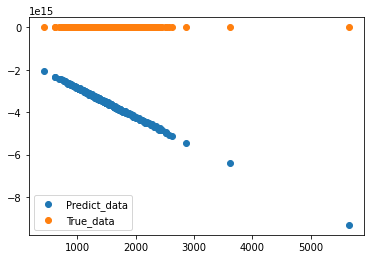

In [50]:
import matplotlib.pyplot as plt

plt.scatter(X_test_home[:,0], y_pred_home, label="Predict_data")
plt.scatter(X_test_home[:,0], y_test_home, label="True_data")
plt.legend()

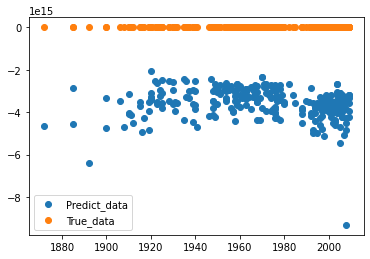

In [51]:
import matplotlib.pyplot as plt

plt.scatter(X_test_home[:,1], y_pred_home, label="Predict_data")
plt.scatter(X_test_home[:,1], y_test_home, label="True_data")
plt.legend()